In [ ]:
what to do. look at invarient mass, presentation, theory students, andget dataset without rec vertgex asnd tgry that.  

In [1]:
import pandas as pd
import os
import numpy as np
import numpy.ma as ma  
import awkward as ak
from tqdm import tqdm 
import torch 
import torch_geometric as tg  
import torch_geometric 
from torch_geometric.data import Data 
#import torch
from torch_geometric.data import InMemoryDataset, download_url  
import torch_geometric.transforms as T 

#NOTE: NEW 2/20/23      
from typing import List, Union   

from torch_geometric.data import Data, HeteroData 
from torch_geometric.data.datapipes import functional_transform
from torch_geometric.transforms import BaseTransform      
torch.cuda.empty_cache()

Device =  cuda:0
DEBUGGING: torch.cuda.is_available() =  True
Number of training graphs: 9955
Number of validation graphs: 1244
Number of test graphs: 1245


/hpc/home/kam264/.local/lib/python3.8/site-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


Epoch  0  Train mse:  0.11377709717800844
Epoch  0  Validation mse:  0.11974220720518057
Epoch  3  Train mse:  0.11021027830843348
Epoch  3  Validation mse:  0.11700046024138522


Text(0, 0.5, 'MSE')

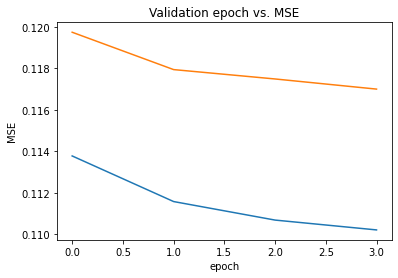

In [1]:
import pandas as pd
import os
import numpy as np
import numpy.ma as ma  
import awkward as ak
from tqdm import tqdm 
import torch 
import torch_geometric as tg  
import torch_geometric 
from torch_geometric.data import Data 
#import torch
from torch_geometric.data import InMemoryDataset, download_url  
import torch_geometric.transforms as T 

#NOTE: NEW 2/20/23      
from typing import List, Union   

from torch_geometric.data import Data, HeteroData 
from torch_geometric.data.datapipes import functional_transform
from torch_geometric.transforms import BaseTransform      
torch.cuda.empty_cache()

#root = '/hpc/group/vossenlab/kam264/mom_magnitude_pi_x_cx_recmomfull_20000' not horrible, ksate around .2
#root = '/hpc/group/vossenlab/kam264/mom_magnitude_pi_x_cx_recfull_vertmom_20000' #much better, bad peak and dip though, so if can fix that, p value
#.09, KstestResult(statistic=0.09777468706536856, pvalue=2.779826736292836e-60)
#root = '/hpc/group/vossenlab/kam264/mom_magnitude_pi_onlymomentum_rec_20000' shit
#root = '/hpc/group/vossenlab/kam264/mom_magnitude_pi_mommnetumvertx_rec_20000'
#root = '/hpc/group/vossenlab/kam264/mom_magnitude_pi_all_rec_20000'#not bad, need to do rec stuff though 
#root = '/hpc/group/vossenlab/kam264/mom_magnitude_pi_all_protmom_20000' #same as above, but got it printed. but rec is jsut z part. 
#root = '/hpc/group/vossenlab/kam264/stupid_idea' #same as above, but got it printed. but rec is jsut z part. 
#root = '/hpc/group/vossenlab/kam264/pi_phi_polar'#, mse seems to be better
#root = '/hpc/group/vossenlab/kam264/pi_theta_polar' #goodd
#root = '/hpc/group/vossenlab/kam264/pi_r_polar' #see slides, week 6 update 
#root = '/hpc/group/vossenlab/kam264/everythingppi_pionvvv' #not what i ment, actully decent at pion zmomnetum.
#root = '/hpc/group/vossenlab/kam264/everythingpi_randomgaus' #bad
#root = '/hpc/group/vossenlab/kam264/everythingpi_rrrrandomgausss'
#root = '/hpc/group/vossenlab/kam264/testt_20000' 
#root = '/hpc/group/vossenlab/kam264/testmrone_20000' 
#root = '/hpc/group/vossenlab/kam264/testrkin_20000' #really bad
#root = '/hpc/group/vossenlab/kam264/test_momcut_20000' 
#root = '/hpc/group/vossenlab/kam264/test_100'
#root = '/hpc/group/vossenlab/kam264/ttest_wmom_eL'
root = '/hpc/group/vossenlab/kam264/ttest_L_imass'
root = '/hpc/group/vossenlab/kam264/test_L_imassss' 
root = '/hpc/group/vossenlab/kam264/test_LL_imass' 
root = '/hpc/group/vossenlab/kam264/L_imass3' #pure lambda one. 


class MyOwnDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.load(self.processed_paths[0])
        # For PyG<2.4:
        # self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return ['some_file_1', 'some_file_2']

    @property
    def processed_file_names(self):
        return ['data.pt']

    def process(self):
        # Read data into huge `Data` list.
        data_list = None

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        self.save(data_list, self.processed_paths[0])
        # For PyG<2.4:
        # torch.save(self.collate(data_list), self.processed_paths[0])

# Create PyG Dataset
#root = '/hpc/group/vossenlab/kam264/pyg_test_rec_traj_dataset_5_28_24/' # 3_14_24 #OLD
dataset = MyOwnDataset(
            root,
            transform=None, #T.Compose([T.ToUndirected(),T.KNNGraph(k=6)]),
            pre_transform=None,
            pre_filter=None
        ) 
dataset  
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import GraphConv
from torch_geometric.nn import global_mean_pool
from torch_geometric.nn.norm import GraphNorm, BatchNorm 

batch_size = 64
LR =1e-3

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
#         torch.manual_seed(12345)
        self.conv1 = GCNConv(in_channels, hidden_channels)#.jittable() #NOTE: NEEDED FOR DEPLOYMENT IN CMAKE
        self.conv2 = GCNConv(hidden_channels, hidden_channels)#.jittable()
        #self.block2 = nn.DataParallel(self.block2)
        #self.conv2 = torch.nn.DataParallel(self.conv2) #this was trying the parallization thing. 
        self.conv3 = GCNConv(hidden_channels, hidden_channels)#.jittable()
        #self.conv3 = torch.nn.DataParallel(self.conv3)
        self.lin1 = Linear(hidden_channels, hidden_channels)
        self.lin2 = Linear(hidden_channels, hidden_channels)
        self.lin3 = Linear(hidden_channels, out_channels)
        self.bn1 = torch_geometric.nn.norm.GraphNorm(hidden_channels)
        self.bn2 = torch_geometric.nn.norm.GraphNorm(hidden_channels)
        self.bn3 = torch_geometric.nn.norm.GraphNorm(hidden_channels)

    def forward(self, x, edge_index, batch): 
        # 1. Obtain node embeddings 
       # x = self.conv1(x, edge_index) #input layer
      #  x = self.bn1(x) #normalize it
     #   x = x.relu() #activation
#         x = torch.nn.function.elu(x)
#        x = self.conv2(x, edge_index)
#        x = self.bn2(x)
#        x = x.relu() 
#         print("x.relu() = ",x)
#        x = self.conv3(x, edge_index)
#        x = self.bn3(x)
#         # 2. Readout layer
 #       x = global_mean_pool(x, batch) #what is this for.           # [batch_size, hidden_channels]
  #      x = F.dropout(x, p=0.5, training=self.training) #for overfitting
   #     x = self.lin3(x)
        
        x = self.conv1(x, edge_index) #input layer                             
                                                      
        x = self.bn1(x) #normalize it                                          

        x = x.relu() #activation                                               
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = x.relu()
#         print("x.relu() = ",x)  
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv3(x, edge_index)
        x = self.bn3(x)
#         # 2. Readout layer                                                   
        x = global_mean_pool(x, batch)
        # 3. Apply a final classifier                                          
        x = F.dropout(x, p=0.5, training=self.training) #for overfittin        
        x = self.lin3(x)

        return x

model = GCN(dataset.num_node_features,64,2)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
#devicee = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu') 
print("Device = ",device)
model = model.to(device)
print("DEBUGGING: torch.cuda.is_available() = ",torch.cuda.is_available())

from torch.utils.data import random_split #TODO: SEE IF YOU CAN USE THIS
# torch.manual_seed(12345)
# print('DEBUGGING: BEFORE: dataset.y.shape = ',dataset.y.shape)
dataset = dataset.shuffle() #shuffle (randmoize placement of it) not sure if this is needed. 
#print('DEBUGGING: AFTER:  dataset.y.shape = ',dataset.y.shape)

#print(len(dataset)) 

fracs = [0.8, 0.1, 0.1] #percent of dataset used for training testing and validatoin 80%,10%,10% #NOTE: SHOULD CHECK np.sum(fracs) == 1 and len(fracs)==3
fracs = [torch.sum(torch.tensor(fracs[:idx])) for idx in range(1,len(fracs)+1)] #get the indexes for training ... parts to use. 
#print(fracs)
split1, split2 = [int(len(dataset)*frac) for frac in fracs[:-1]] 
train_dataset = dataset[:split1]
val_dataset = dataset[split1:split2]
test_dataset = dataset[split2:] 

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of validation graphs: {len(val_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}') 

from torch_geometric.loader import DataLoader 
#from torch.utils.data import WeightedRandomSampler


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)#, drop_last=True)
val_loader = DataLoader(val_dataset,  batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) 

model = GCN(dataset.num_node_features, dataset.num_classes, 1).to(device) #initiate the model, #2 is the number of outputs here is 2 as pion_z, proton_z 

optimizer = torch.optim.Adam(model.parameters(), lr= LR) #get the optimizer

data_labels = train_dataset.y 
#weight_signal = counts[1]/counts[0]#DEBUGGING MULTIPLY BY 2 ...
#print("weight_signal = ",weight_signal) 
# weight = torch.FloatTensor([weight_signal, 1.0]).to(device) #NOTE: That labels are [sg?,bg?] so label 0 in this case is sg and label 1 is bg.


#losss = torch.nn.MSELoss(reduction = 'mean').to(device)
#losss = torch.sqrt(losss)

#RMSE loss. 
def RMSELoss(out,y):
    return torch.sqrt(torch.mean((out-y)**2))
losss = RMSELoss 

#custom losss
def pion_los(out,y):
    mse_pi = 0
    for j in range(len(out)):
            #x_pi = out[j][0]; x_p =out[j][1]                                                                                                                                                                                                 

        mse_pi += (out[j][0]-y[j][0].item() )**2
    return torch.sqrt(mse_pi/len(out))

#losss = pion_los



def train():
    model.train() #initailize the model                                                                                                                                                                                                       
    #for i, data in tqdm(enumerate(train_loader)): #perhaps tqdm(enumerate(train_loader)), i is index, data jsut moves through all the dtaa in trainingg                                                                                      
    for i,data in enumerate(train_loader):
        data = data.to(device) #switch to GPU                                                                                                                                                                                                 
        optimizer.zero_grad() #                                                                                                                                                                                                               
        out = model(data.x, data.edge_index, data.batch).to(device)  # Perform a single forward pass                                                                                                                                          
        yy = []
        for j in range(0,len(out)):
            yy+= [[data.y[j].item()]]

        yy = torch.tensor(yy).to(device)
        #print(out)
        #print(yy)
        loss = losss(out, yy).to(device) #compute the loss  
        #print(loss)
        loss.backward() #get the gradients.                                                                                                                                                                                                   
        optimizer.step() #take a step.                                                                                                                                                                                                        

#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_auc_score 

def test(loader):
    length = len(loader.dataset)
    model.eval() #evaluate teh model.                                                                                                                                                                                                         

    #mse_tot = []                                                                                                                                                                                                                             
    mse_total = 0
    mse_pi = 0
    mse_p = 0
    #r                                                                                                                                                                                                                                        
    #for data in tqdm(loader):  # Iterate in batches over the training/test dataset.                                                                                                                                                          
    for data in loader:
        data = data.to(device) #put to GPU                                                                                                                                                                                                    
        out = model(data.x, data.edge_index, data.batch).to(device) #evalueate                                                                                                                                                                
        #this and the for loop is converting data.y to a tensor in the same shape as out rows and 2 columns first is y_pion second is y_proton                                                                                                
        yy = []
        for j in range(0,len(out)):
            yy+= [[data.y[j].item()]]
        yy = torch.tensor(yy).to(device) 
        loss = losss(out, yy).cpu() #getting teh loss function                                                                                                                                                                                
        mse_total+=loss.item() #getting the mse (total)                                                                                                                                                                                       
        #for j in range(len(out)):
            #x_pi = out[j][0]; x_p =out[j][1]                                                                                                                                                                                                 

         #   mse_pi += (out[j][0].item()-yy[j][0].item() )**2
          #  mse_p +=(out[j][1].item()-yy[j][1].item())**2

        #)                                                                                                                                                                                                                                    
    return mse_total/length #, np.sqrt(mse_total/length), mse_pi/length, np.sqrt(mse_pi/length), mse_p/length, np.sqrt(mse_p/length) 

        
def print_out():
    model.eval() #initailize the model                                                                                                                                                                                                        
    #for i, data in tqdm(enumerate(train_loader)): #perhaps tqdm(enumerate(train_loader)), i is index, data jsut moves through all the dtaa in trainingg                                                                                      
    outt= []
    for i,data in enumerate(test_loader):
        data = data.to(device) #switch to GPU                                                                                                                                                                                                 
        optimizer.zero_grad() #                                                                                                                                                                                                               
        out = model(data.x, data.edge_index, data.batch).to(device)  # Perform a single forward pass                                                                                                                                          
        out = out.cpu()
        #yy = []                                                                                                                                                                                                                              
        #for j in range(0,2*len(out),2):                                                                                                                                                                                                      
        #    fuckk = data.y[j]; fuckj = data.y[j+1]                                                                                                                                                                                           
        #    yy +=[[fuckk.item(),fuckj.item()]]                                                                                                                                                                                               
        #yy = torch.tensor(yy).to(device)                                                                                                                                                                                                     
        #loss = losss(out, yy).cpu() #compute the loss                                                                                                                                                                                        
        outt+=[[out.detach().numpy()]]
    return outt

def print_outb():
    model.eval() #initailize the model                                                                                                                                                                                                        
    #for i, data in tqdm(enumerate(train_loader)): #perhaps tqdm(enumerate(train_loader)), i is index, data jsut moves through all the dtaa in trainingg                                                                                      
    outt= []
    for i,data in enumerate(test_loader):
        data = data.to(device) #switch to GPU                                                                                                                                                                                                 
        optimizer.zero_grad() #                                                                                                                                                                                                               
        out = model(data.x, data.edge_index, data.batch).to(device)  # Perform a single forward pass                                                                                                                                          
        out = out.cpu()
        #yy = []                                                                                                                                                                                                                              
        #for j in range(0,2*len(out),2):                                                                                                                                                                                                      
        #    fuckk = data.y[j]; fuckj = data.y[j+1]                                                                                                                                                                                           
        #    yy +=[[fuckk.item(),fuckj.item()]]                                                                                                                                                                                               
        #yy = torch.tensor(yy).to(device)                                                                                                                                                                                                     
        #loss = losss(out, yy).cpu() #compute the loss     
        neww = []
        for j in enumerate(test_loader):
            neww.append(out[j]-data.elc)
        outt+=[[new.detach().numpy()]]
    return outt
nepochs =  4
train_metrics = {'mse':[], "rmse":[], 'mse_pi':[], 'rmse_pi':[], 'mse_p':[], 'rmse_p':[] } 
vall_metrics = {'mse':[], "rmse":[], 'mse_pi':[], 'rmse_pi':[], 'mse_p':[], 'rmse_p':[] }

for epoch in range(nepochs):  
    '''
    if epoch ==(nepochs-1):
        model.eval()
        outt = []
        for i, data in enumerate(train_loader):
            data = data.to(device) 
            out = model(data.x, data.edge_index, data.batch).to(device)
            out = out.cpu()
            outt+=[[out.detach().numpy()]]
        #print(outt)
        #break'''
    #print("BEFORE TRAIN()")                                                                                                                                                                                                                  
    train()
    #print("BEFORE TEST(TRAIN_LOADER)")                                                                                                                                                                                                       
    #train_mse, train_rmse, train_mse_pi, train_rmse_pi, train_mse_p, train_rmse_p = test(train_loader)
    train_mse = test(train_loader)

    train_metrics['mse'].append(train_mse) 
    #train_metrics['rmse'].append(train_rmse)
    #train_metrics['mse_pi'].append(train_mse_pi)
    #train_metrics['rmse_pi'].append(train_rmse_pi)
    #train_metrics['mse_p'].append(train_mse_p)
    #train_metrics['rmse_p'].append(train_rmse_p)

    #print("BEFORE TEST(VAL_LOADER)")                                                                                                                                                                                                         
    #vall_mse, vall_rmse, vall_mse_pi, vall_rmse_pi, vall_mse_p, vall_rmse_p = test(val_loader)
    vall_mse =test(val_loader) 
    #if epoch==0 or val_roc_auc >np.max(val_metrics["roc_auc"]) :                                                                                                                                                                             
    #    model_best_auc = model                                                                                                                                                                                                               
    #    PATH = '/work/clas12/users/mfmce/CLAS12_Lambda_resolution_REU_2023/model_best_auc.pt'                                                                                                                                                
    #    torch.save({                                                                                                                                                                                                                         
    #        'epoch': epoch,                                                                                                                                                                                                                  
    #        'model_state_dict': model.state_dict(),                                                                                                                                                                                          
    #        'optimizer_state_dict': optimizer.state_dict(),                                                                                                                                                                                  
 #             'loss': loss,                                                                                                                                                                                                                  
    #        }, PATH)                                                                                                                                                                                                                         

    vall_metrics['mse'].append(vall_mse)
    #vall_metrics['rmse'].append(vall_rmse)
    #vall_metrics['mse_pi'].append(vall_mse)
    #vall_metrics['rmse_pi'].append(vall_mse)
    #vall_metrics['mse_p'].append(vall_mse)
    #all_metrics['rmse_p'].append(vall_mse)
    if epoch%9==0:
        print("Epoch ",epoch," Train mse: ",train_mse)
        print("Epoch ",epoch," Validation mse: ",vall_mse)
        #print("Epoch ",epoch," Train mse: ",train_mse," Train rmse: ",train_rmse," Train mse pion: ",train_mse_pi,
         #     " Train rmse pion: ",train_rmse_pi, "Train mse proton:",train_mse_p, "Train rmse proton:",train_rmse_p)
        #print("Epoch ",epoch," Validation mse: ",vall_mse," Validation rmse: ",vall_rmse," Validation mse pion: ",vall_mse_pi,
        #      " Validation rmse pion: ",vall_rmse_pi, "Validation mse proton:",vall_mse_p, "Validation rmse proton:", vall_rmse_p)
    if epoch==(nepochs-1):
        a = print_out()
        #b=  print_outb()
        print("Epoch ",epoch," Train mse: ",train_mse)
        print("Epoch ",epoch," Validation mse: ",vall_mse)
        #print("Epoch ",epoch," Train mse: ",train_mse," Train rmse: ",train_rmse," Train mse pion: ",train_mse_pi,
        #      " Train rmse pion: ",train_rmse_pi, "Train mse proton:",train_mse_p, "Train rmse proton:",train_rmse_p)
        #print("Epoch ",epoch," Validation mse: ",vall_mse," Validation rmse: ",vall_rmse," Validation mse pion: ",vall_mse_pi,
        #      " Validation rmse pion: ",vall_rmse_pi, "Validation mse proton:",vall_mse_p, "Validation rmse proton:", vall_rmse_p) 

        #print(a)
        #b = print_outb()
import matplotlib.pyplot as plt 

epochs = [i for i in range(len(train_metrics["mse"]))]   
plt.figure()
plt.title('Training epoch vs. MSE') 
plt.plot(epochs, train_metrics['mse']) 
plt.xlabel('epoch')
plt.ylabel('MSE')


plt.title('Validation epoch vs. MSE')   
plt.plot(epochs, vall_metrics['mse'])  
plt.xlabel('epoch') 
plt.ylabel('MSE')  


Text(0.5, 0, 'Location of Pion vertex (cm)')

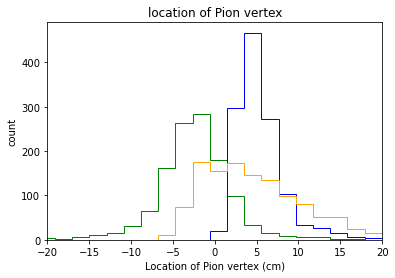

In [2]:
pi_x = []; p_x = [] 
#pi_val = []
for i in range(len(a)):
    for j in range(len(a[i][0])): 
        pi_x.append(a[i][0][j][0].item())
        
        #p_x.append(a[i][0][j][1].item()) 

pi_yy = [] 
#p_yy = []

pi_rec_y = []
#p_rec_y = []
for i, data in enumerate(test_loader):
    data = data#.to(device) #put to GPU
    #break
    for j in range(0,int(len(data.y))): 
        pi_yy.append(data.y[j].item())
 #       p_yy.append(data.y[j+1].item())

        #pi_rec_y.append(data.rec[j].item()) 
       # p_rec_y.append(data.rec[j+1].item())
    for j in range(len(data.rec)):
        #pi_rec_y.append(data.rec[j][0][0])
        pi_rec_y.append(data.rec[j][0])
       # p_rec_y.append(data.rec[j][0][1])


#plott_pi = np.zeros((len(pi_x),4))
#plott_p = np.zeros((len(p_x),2)) 
plott_pi = np.zeros((len(pi_x),3))
for i in range(len(pi_x)):
#for i in range(982):
    plott_pi[i][0] = pi_yy[i]
    plott_pi[i][1] = pi_x[i]
    #plott_pi[i][3] = pi_val[i]
   # plott_pi[i][2] = pi_rec_y[i] 
   # plott_p[i][0] = p_yy[i]
   # plott_p[i][1] = p_x[i]
    #plott_p[i][2]  = p_rec_y[i]  
for i in range(len(pi_rec_y)):  
    plott_pi[i][2] = pi_rec_y[i] 
#plott_pi 
plt.figure
plt.title('location of Pion vertex') 
#plt.axvline(x = np.mean(pi_x), color = 'blue')
#plt.axvline(x = np.mean(pi_yy), color = 'orange') 
plt.hist(x = plott_pi, histtype ='step', color = ['orange', 'blue', 'green'], bins = 100 )
#plt.hist(x = plott_pi, histtype ='step',  bins = 100 )
#plt.legend(['Predicted', 'True', 'REC']) 
plt.xlim((-20,20)) 
plt.ylabel('count')
plt.xlabel('Location of Pion vertex (cm)')
#plt.savefig("/hpc/volatile/group/vossenlab/dir_name_2/") 
#plt.savefig("output.pdf")
#plt.hist(x = plott_pi, histtype ='bar', color = ['orange', 'blue'], bins = 30) 


KstestResult(statistic=0.3317269076305221, pvalue=4.833607257465605e-61)
KstestResult(statistic=0.5124497991967871, pvalue=2.512789612012345e-149)
5.130026571997572
9.400120947224623
-0.007019314911575561
6.836823963015161
-7.515911527152686
12.193402033086226


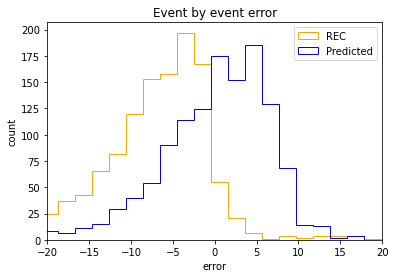

In [3]:
from scipy.stats import kstest   
print(kstest(pi_x, pi_yy)) 
print(kstest(pi_rec_y, pi_yy))   
diff_x = []  
diff_rec = []
for i in range(len(pi_x)):
    diff_x.append(np.sqrt((pi_x[i]-pi_yy[i])**2))
    diff_rec.append(np.sqrt((pi_rec_y[i]-pi_yy[i])**2))
print(np.mean(diff_x)) 
print(np.mean(diff_rec)) 
dif_x = [] 
dif_rec = []
for i in range(len(pi_x)):
    dif_x.append((pi_x[i]-pi_yy[i]))
    dif_rec.append((pi_rec_y[i]-pi_yy[i]))

plottt = np.zeros((len(dif_x), 2)) 
for i in range(len(dif_x)): 
    plottt[i][0] = dif_x[i]
    plottt[i][1] = dif_rec[i]

plt.title('Event by event error')
n, bins = plt.hist(x = plottt, histtype = 'step', color = ['blue', 'orange'], bins = 100)[-1]
plt.legend(['REC', 'Predicted'])
plt.ylabel('count')
plt.xlabel('error')

plt.xlim((-20, 20)) 
from scipy.stats import norm as nm

from statistics import NormalDist
norm = NormalDist.from_samples(dif_x) 
print(norm.mean) 
print(norm.stdev)
xxx = np.linspace(-20, 20, 100)
from statistics import NormalDist 
norm = NormalDist.from_samples(dif_rec) 
print(norm.mean) 
print(norm.stdev) 
xxx = np.linspace(-20, 20, 100)   

(array([  1.,   1.,   8.,   3.,  10.,  11.,  28.,  35.,  67.,  90., 109.,
        145., 132., 103.,  86.,  69.,  45.,  36.,  26.,  18.,  27.,  15.,
         13.,  17.,  13.,  15.,   9.,  11.,  11.,   5.,   7.,   3.,   7.,
          9.,   4.,   6.,  12.,   2.,   1.,   7.,   5.,   3.,   2.,   3.,
          3.,   3.,   5.,   1.,   1.,   2.]),
 array([1.07870729, 1.08188978, 1.08507227, 1.08825477, 1.09143726,
        1.09461975, 1.09780224, 1.10098474, 1.10416723, 1.10734972,
        1.11053221, 1.11371471, 1.1168972 , 1.12007969, 1.12326218,
        1.12644468, 1.12962717, 1.13280966, 1.13599216, 1.13917465,
        1.14235714, 1.14553963, 1.14872213, 1.15190462, 1.15508711,
        1.1582696 , 1.1614521 , 1.16463459, 1.16781708, 1.17099957,
        1.17418207, 1.17736456, 1.18054705, 1.18372954, 1.18691204,
        1.19009453, 1.19327702, 1.19645951, 1.19964201, 1.2028245 ,
        1.20600699, 1.20918948, 1.21237198, 1.21555447, 1.21873696,
        1.22191946, 1.22510195, 1.22828444, 1.

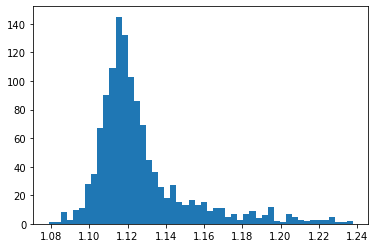

In [5]:
pi_mas = []
#p_rec_y = []
for i, data in enumerate(test_loader):
    data = data#.to(device) #put to GPU
    #break
    for j in range(0,int(len(data.imass))): 
        pi_mas.append(data.imass[j][0])  
plt.hist(pi_mas, bins = 50) 
#plt.xlim((0,3))  

(array([   6.,   18.,   40.,   65.,  100.,  135.,  258.,  356.,  554.,
         775., 1256., 1592., 1286.,  968.,  778.,  613.,  484.,  371.,
         315.,  286.,  301.,  212.,  185.,  174.,  148.,  133.,  101.,
          81.,   72.,   79.,   50.,   46.,   63.,   40.,   36.,   47.,
          52.,   22.,   41.,   38.,   36.,   14.,   19.,   38.,   32.,
          30.,   26.,   21.,   21.,   30.]),
 array([1.07828601, 1.08151668, 1.08474735, 1.08797802, 1.09120869,
        1.09443936, 1.09767003, 1.1009007 , 1.10413137, 1.10736204,
        1.11059271, 1.11382339, 1.11705406, 1.12028473, 1.1235154 ,
        1.12674607, 1.12997674, 1.13320741, 1.13643808, 1.13966875,
        1.14289942, 1.14613009, 1.14936076, 1.15259143, 1.1558221 ,
        1.15905277, 1.16228344, 1.16551411, 1.16874478, 1.17197545,
        1.17520612, 1.17843679, 1.18166746, 1.18489813, 1.1881288 ,
        1.19135947, 1.19459014, 1.19782081, 1.20105149, 1.20428216,
        1.20751283, 1.2107435 , 1.21397417, 1.21720484, 

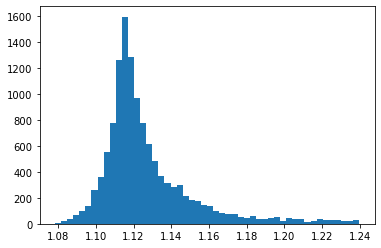

In [2]:
class MyOwnDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.load(self.processed_paths[0])
        # For PyG<2.4:
        # self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return ['some_file_1', 'some_file_2']

    @property
    def processed_file_names(self):
        return ['data.pt']

    def process(self):
        # Read data into huge `Data` list.
        data_list = None

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        self.save(data_list, self.processed_paths[0])
        # For PyG<2.4:
        # torch.save(self.collate(data_list), self.processed_paths[0])

# Create PyG Dataset
#root = '/hpc/group/vossenlab/kam264/pyg_test_rec_traj_dataset_5_28_24/' # 3_14_24 #OLD


root = '/hpc/group/vossenlab/kam264/ttest_L_imass'
root = '/hpc/group/vossenlab/kam264/test_L_imassss' 
root = '/hpc/group/vossenlab/kam264/test_LL_imass' 
root = '/hpc/group/vossenlab/kam264/L_imass3' #the pure lambda one

dataset = MyOwnDataset(
            root,
            transform=None, #T.Compose([T.ToUndirected(),T.KNNGraph(k=6)]),
            pre_transform=None,
            pre_filter=None
        ) 
dataset 
import matplotlib.pyplot as plt
pi_mas = []
#p_rec_y = []
for i, data in enumerate(dataset):
    data = data#.to(device) #put to GPU
    #break
    for j in range(0,int(len(data.imass))): 
        pi_mas.append(data.imass[j])  
plt.hist(pi_mas, bins = 50)  


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

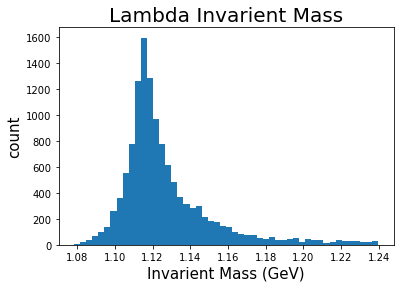

In [3]:
pi_mas = []
#p_rec_y = []
for i, data in enumerate(dataset):
    data = data#.to(device) #put to GPU
    #break
    for j in range(0,int(len(data.imass))): 
        pi_mas.append(data.imass[j])  
plt.hist(pi_mas, bins = 50) 
plt.title('Lambda Invarient Mass', fontsize = 20)
plt.xlabel('Invarient Mass (GeV)', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.yticks(fontsize=10)
plt.yticks(fontsize=10)